<a href="https://colab.research.google.com/github/OliviaIntan/IPSD-Assignment/blob/main/Tugas%205/Unguided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [6]:
# Melakukan load dataset yaitu data diagnosis diabetes
data = pd.read_csv('/content/Training - Training.csv')

In [3]:
# Memeriksa informasi data seputar jumlah baris dan kolom, tipe data, dan jumlah data non-null per kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


Dapat diketahui bahwa data diagnosa diabetes memiliki 9 kolom dan 2460 baris. Kemudian terdapat dua kolom yang bertipe data float yaitu 'BMI' dan 'DiabetesPedigreeFunction', sedangkan 7 lainnya bertipe data integer. Terlihat juga jumlah non-null tiap kolomnya.

In [7]:
# Mengecek ukuran data
data.shape

(2460, 9)

In [8]:
# Menampilkan 5 baris pertama data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Disini variabel yang akan kita klasifikasikan adalah 'Outcome', yang terdiri dari 0 dan 1. Dimana Outcome 0 menunjukkan pasien tidak terdiagnosis diabetes (negatif diabetes), dan Outcome 1 menunjukkan pasien terdiagnosis diabetes (positif diabetes).

In [9]:
# Menampilkan 5 baris terbawah data
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2455,3,126,88,41,235,39.3,704.0,27,0
2456,4,123,62,0,0,32.0,226.0,35,1
2457,1,80,74,11,60,30.0,527.0,22,0
2458,1,96,64,27,87,33.2,289.0,21,0
2459,6,105,70,32,68,30.8,122.0,37,0


In [10]:
# Menampilkan 5 baris data acak
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
122,2,107,74,30,100,33.6,404.0,23,0
1545,4,95,64,0,0,32.0,161.0,31,1
650,2,108,80,0,0,27.0,259.0,52,1
147,2,106,64,35,119,30.5,1.4,34,0
701,4,144,82,32,0,38.5,554.0,37,1


In [11]:
# Melihat statistik deskriptif data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,354.607701,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,256.114465,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,178.000000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,303.000000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,542.000000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,997.000000,81.000000,1.000000


In [12]:
# Mengecek missing value atau data yang hilang
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Terlihat bahwa data tidak memiliki missing value

In [13]:
# Mengecek data yang duplikat
data.duplicated().sum()

2000

Data memiliki sebanyak 2000 duplikat

In [14]:
# Menampilkan data duplikat
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
460,5,132,80,0,0,26.8,186.0,69,0
461,3,139,54,0,0,25.6,402.0,22,1
462,0,125,96,0,0,22.5,262.0,21,0
463,2,108,80,0,0,27.0,259.0,52,1
464,0,161,50,0,0,21.9,254.0,65,0
...,...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,704.0,27,0
2456,4,123,62,0,0,32.0,226.0,35,1
2457,1,80,74,11,60,30.0,527.0,22,0
2458,1,96,64,27,87,33.2,289.0,21,0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

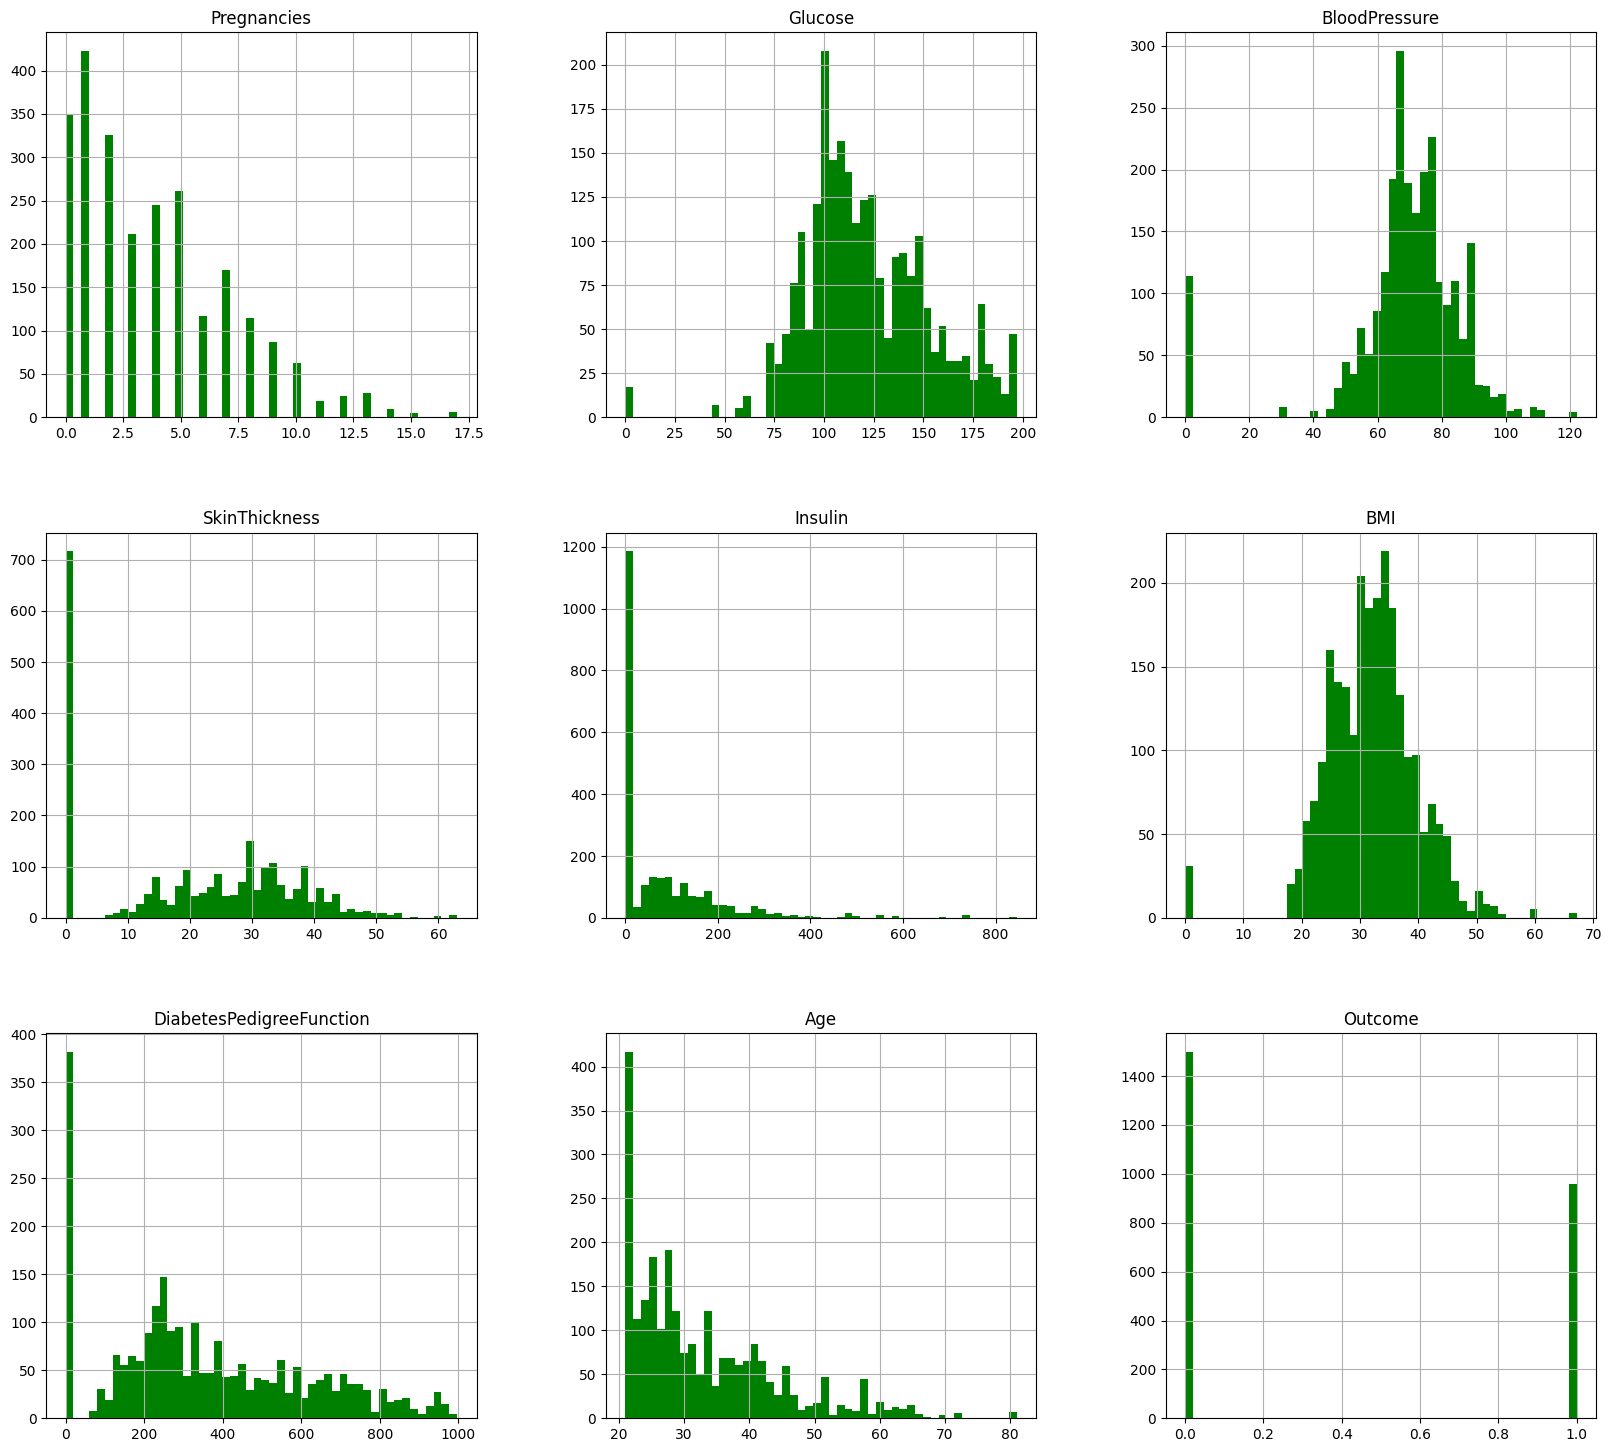

In [15]:
# Menampilkan distribusi data tiap kolom
data.hist(bins=50, figsize=(20, 18), color='green')

In [16]:
# Melakukan imputasi dengan mengganti nilai 0 menjadi NaN pada kolom tertentu
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

# Mengisi nilai NaN dengan median dari masing-masing kolom
data[cols_to_replace] = data[cols_to_replace].fillna(data[cols_to_replace].median())


Kolom yang memiliki kemungkinan nilai 0 sebagai outlier diubah menjadi NaN. NaN diisi dengan median kolom untuk menjaga distribusi.

In [18]:
# Transformasi log untuk kolom dengan distribusi skewed
cols_skewed = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']
for col in cols_skewed:
    data[col] = np.log1p(data[col])  # Menggunakan log1p untuk menghindari log(0)

Kolom skewed diubah menggunakan np.log1p agar distribusi lebih normal.

In [19]:
# Standarisasi kolom numerik
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Data diskalakan menggunakan StandardScaler agar semua fitur memiliki skala yang seimbang.

<Axes: title={'center': 'Correlation Between Variables'}>

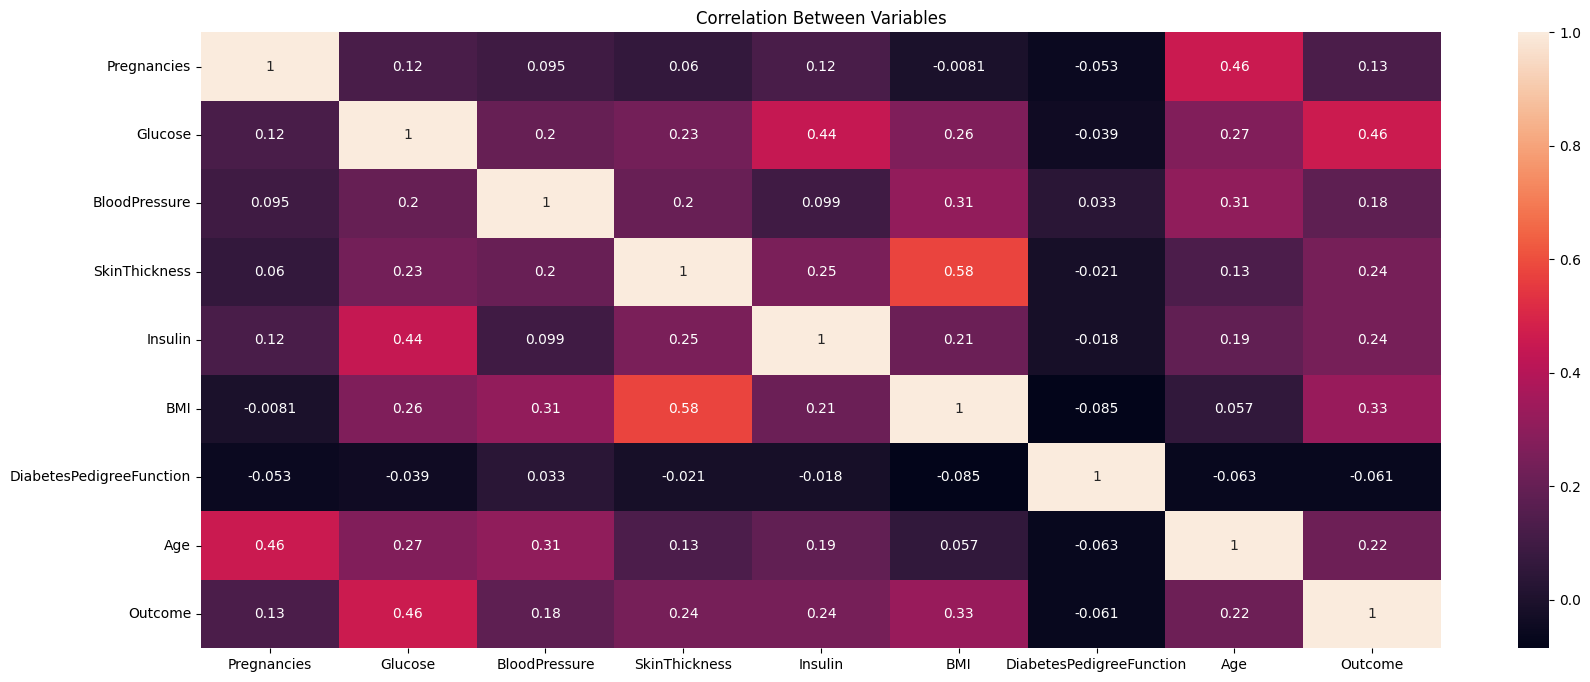

In [20]:
# Pemeriksaan korelasi
plt.figure(figsize=(20,8))
plt.title('Correlation Between Variables')
sns.heatmap(data=data.corr(), annot=True)

Berdasarkan heatmap di atas, dapat diketahui hubungan antara variabel-variabel dalam dataset tersebut.
1. 'Glucose' memiliki skor korelasi 0,46 dengan 'Outcome. Hal ini berarti kedua variabel memiliki korelasi positif yang kuat. Ini menunjukkan bahwa semakin tinggi kadar glukosa seseorang, semakin tinggi kemungkinan mereka terkena diabetes.
2. 'BMI' memiliki skor korelasi 0,33 dengan 'Outcome'. Hal ini berarti kedua variabel menunjukkan korelasi positif yang kuat. Ini menunjukkan bahwa semakin tinggi BMI seseorang, semakin tinggi kemungkinan mereka terkena diabetes.


<Axes: xlabel='Outcome', ylabel='count'>

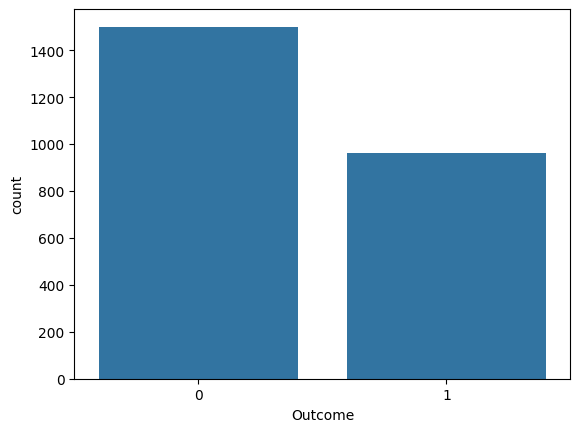

In [21]:
# Melihat distribusi variabel target
sns.countplot(x='Outcome', data=data)

Terlihat bahwa data sudah lumayan balance

In [23]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Bagi data menjadi set pelatihan dan pengujian (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [27]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [28]:
# Evaluasi KNN
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

[[297   8]
 [  2 185]]
0.9796747967479674
0.9893048128342246
0.9585492227979274


<Axes: >

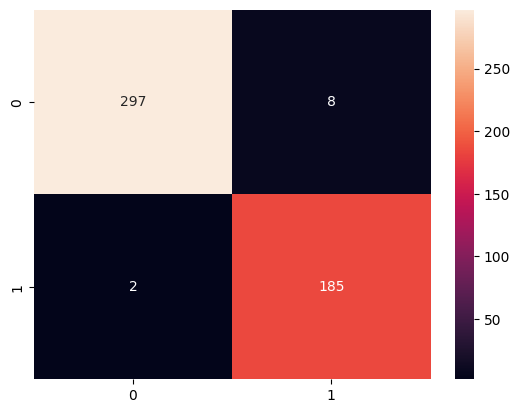

In [29]:
# Visualisasi
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

In [30]:
# Evaluasi Model Decision Tree
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[305   0]
 [  1 186]]
0.9979674796747967
0.9946524064171123
1.0


<Axes: >

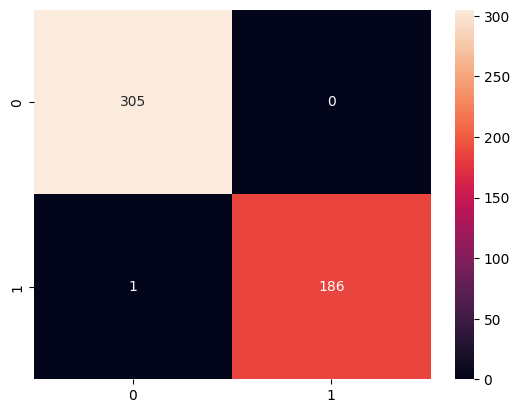

In [31]:
# Visualisasi
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [32]:
# Evaluasi Model Naive Bayes
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(recall_score(y_test, y_pred_nb))
print(precision_score(y_test, y_pred_nb))

[[231  74]
 [ 74 113]]
0.6991869918699187
0.6042780748663101
0.6042780748663101


<Axes: >

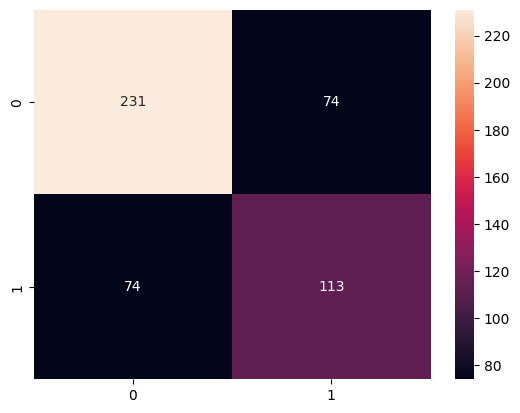

In [33]:
# Visualisasi
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')

Kesimpulan:

Pada analisis ini kita ingin memastikan bahwa sebanyak mungkin pasien yang benar-benar memiliki diabetes terdeteksi, sehingga kita menggunakan matriks evaluasi recall untuk mengevaluasi algoritma klasifikasi yang memiliki performa paling baik diantara KNN, Decision Tree, dan Naive Bayes.
Dari output di atas dapat diketahui nilai recall pada algoritma klasifikasi KNN, DT, dan NB secara berurutan adalah 0.98, 0.99, 0.6. Dengan demikian, dapat disimpulkan bahwa algoritma klasifikasi yang paling baik untuk mendiagnosa penyakit diabetes adalah Decision Tree.